### Homework
A. Los resultados de este experimento dependen de los datos generados. Repita el experimento  $n=1000$, $\mathcal{N}(\mu=10$, $\sigma=1$), 250 veces y describa cuales son las distribuciones que mejor ajustan en el sentido de tener más bajo y menor varianza en el AIC.

B. Repita A el sentido de tener más bajo BIC (Criterio de informacion Bayesiana). $BIC(Model,Data)= \ln(n)k - 2 \ln(\mathcal{L(Model,Data)})$

C. Realice (A) (Se debe mantener $n=1000$), incluyendo datos contaminados de una normal con parametros ($\mu=$5,$\sigma$=1):

    a) (1%) 
    
    b) (5%)
    
    c) (10%)
    
Cuales son las distribuciones que mejor ajustan en el sentido de tener más bajo y menor varianza en el AIC?
    

D. Analice la robustes del ajuste de las distribuciones por medio del AIC. Es decir, compare la diferencia de AIC para distribuciones con/sin contaminaciones, usando el mismo tipo de simulaciones en 2. 

E. Repita (A-C) generando $n=1000$ datos de la distribución $abs(\mathcal{N}(\mu=0, \sigma=2)$ donde abs significa valor absoluto.

In [1]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt
import warnings
import math
import time
from tqdm import tqdm
warnings.filterwarnings("ignore")

def AIC(distr,param,data):
    """Calcula el criterio de información de Akaike"""
    """https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_de_Akaike"""
    return 2*len(param)-2*np.sum(distr.logpdf(data,param[0],param[1],*param[2:]))
def BIC(distr,param,data):
    """Calcula el criterio de información de Akaike"""
    """https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_de_Akaike"""
    return (math.log(len(data))*len(param))-2*np.sum(distr.logpdf(data,param[0],param[1],*param[2:]))

In [2]:
n=1000
data = np.random.normal(10, 1, n)
#Carga todas la posible distribuciones que tienen la posibilidad de usar "fit"
distrlist=[]
for this in dir(stats):
    if "fit" in eval("dir(stats." + this +")"):
        distrlist.append(this)
print(distrlist)

['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircula

In [3]:
# Loop para Punto A y B
n = 1000 # Número de muestras
rep = 25  # Número de repeticiones
listAIC=[]
# Matriz para el punto A
listAICTot=np.zeros((len(distrlist),rep))
# Matriz para el punto B
listBICTot=np.zeros((len(distrlist),rep))
for i in range(rep):
    np.random.seed(107+i)
    data = np.random.normal(10,1,n)
    lnspc = np.linspace(6, 14, len(data))
    j = -1
    for distrName in distrlist:
        j+=1
        distr = getattr(stats.distributions, distrName)
        try:  
            #print('Distribución:',distrName)
            param = distr.fit(data)
            pdf = distr.pdf(lnspc, *param)
            #plt.plot(lnspc, pdf, label=distrName)
            #print('Número de parámetros: ',len(param))
            resAIC=AIC(distr,param,data)
            if resAIC<0:
                resAIC=np.Inf
            listAIC.append(resAIC)
            #print('AIC: ',resAIC)
            #print('*'*50)
            resBIC=BIC(distr,param,data)
            if resBIC<0:
                resBIC=np.Inf
        except:
            #print('Error')
            listAIC.append(np.Inf)
            resAIC=np.Inf
            resBIC=np.Inf
        listAICTot[j,i]=resAIC
        listBICTot[j,i]=resBIC

Se aplica el mismo código que se vio en clase, pero se le realiza la modificación 
de que en cada valor este guarde todos los AIC y BIC de tal manera que podemos hacer el
primer y el segundo punto directamente.

In [4]:
listAICprom = listAICTot.mean(axis=1)
listAICvar = listAICTot.var(axis=1)

Distribución: norm
Número de parámetros:  2
AIC:  2845.49989673028
Var AIC:  1861.756553676923
**************************************************
Distribución: tukeylambda
Número de parámetros:  3
AIC:  2846.5118058810535
Var AIC:  1898.4813193673479
**************************************************
Distribución: powernorm
Número de parámetros:  3
AIC:  2846.5886744298787
Var AIC:  1893.3763396986021
**************************************************
Distribución: skewnorm
Número de parámetros:  3
AIC:  2846.671639351796
Var AIC:  1889.1427228071668
**************************************************
Distribución: pearson3
Número de parámetros:  3
AIC:  2846.6794370863868
Var AIC:  1884.3311756182434
**************************************************
Distribución: gennorm
Número de parámetros:  3
AIC:  2846.7248484872316
Var AIC:  1899.7412811506736
**************************************************
Distribución: rice
Número de parámetros:  3
AIC:  2846.9476229269903
Var AIC:  1854.161

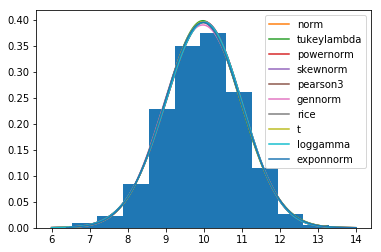

In [5]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICprom))[0:10]]
bestAIC=np.sort(np.array(listAICprom))[0:10]
bestAICvar=np.array(listAICvar)[np.argsort(np.array(listAICprom))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC[i])
    print('Var AIC: ',bestAICvar[i])
    print('*'*50)
                
plt.legend()               
plt.show()

Usando tambien este código visto en clase, escogemos los AIC que mejor 
promedio de AIC tengan, encontrando así distribuciones que son esperadas como 
la normal, la skewnormal, la powernorm, la gen normal, la exponencial normal entre otras,
que en general la que mejor se ajusta en promedio es la normal, distribución 
de la cual provienen los datos

Distribución: recipinvgauss
Número de parámetros:  3
AIC:  2857.277414826163
Var AIC:  1802.6165968776238
**************************************************
Distribución: erlang
Número de parámetros:  3
AIC:  2848.604562315484
Var AIC:  1821.8823708211087
**************************************************
Distribución: gamma
Número de parámetros:  3
AIC:  2848.59270576133
Var AIC:  1825.327695218793
**************************************************
Distribución: nct
Número de parámetros:  4
AIC:  2851.679012873676
Var AIC:  1829.9189097209344
**************************************************
Distribución: chi
Número de parámetros:  3
AIC:  2848.6484219493345
Var AIC:  1832.4807992207307
**************************************************
Distribución: alpha
Número de parámetros:  3
AIC:  2861.305888819852
Var AIC:  1839.8497149307577
**************************************************
Distribución: norminvgauss
Número de parámetros:  4
AIC:  2850.490928911635
Var AIC:  1849.07878908960

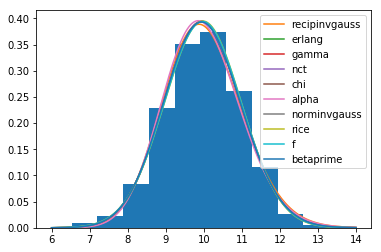

In [6]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICvar))[0:10]]
bestAICvar=np.sort(np.array(listAICvar))[0:10]
bestAIC=np.array(listAICprom)[np.argsort(np.array(listAICvar))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC[i])
    print('Var AIC: ',bestAICvar[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Se observa que las que poseen menor varianza el AIC, no son las que mejor ajustan a los datos originales, los cuales provienen de una distribución normal.

In [7]:
#Punto B
listBICprom = listBICTot.mean(axis=1)
listBICvar = listBICTot.var(axis=1)

Distribución: norm
Número de parámetros:  2
BIC:  2855.3154072882444
Var BIC:  1861.756553676923
**************************************************
Distribución: tukeylambda
Número de parámetros:  3
BIC:  2861.235071717999
Var BIC:  1898.481319367348
**************************************************
Distribución: powernorm
Número de parámetros:  3
BIC:  2861.3119402668253
Var BIC:  1893.376339698602
**************************************************
Distribución: skewnorm
Número de parámetros:  3
BIC:  2861.3949051887425
Var BIC:  1889.1427228071668
**************************************************
Distribución: pearson3
Número de parámetros:  3
BIC:  2861.4027029233325
Var BIC:  1884.3311756182427
**************************************************
Distribución: gennorm
Número de parámetros:  3
BIC:  2861.448114324178
Var BIC:  1899.7412811506736
**************************************************
Distribución: rice
Número de parámetros:  3
BIC:  2861.670888763936
Var BIC:  1854.16125

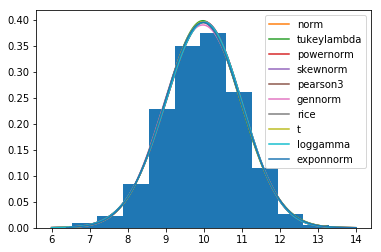

In [8]:
bestDist=np.array(distrlist)[np.argsort(np.array(listBICprom))[0:10]]
bestBIC=np.sort(np.array(listBICprom))[0:10]
bestBICvar=np.array(listBICvar)[np.argsort(np.array(listBICprom))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('BIC: ',bestBIC[i])
    print('Var BIC: ',bestBICvar[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Se observa que con el BIC no se posee mucha granancia, dado que este está diseñado para muestras un poco más pequeñas, de tal manera que se poseen tambien que los mejores valores promedio son de la normal o de algunas distribuciones que son similares a la normal

Distribución: recipinvgauss
Número de parámetros:  3
BIC:  2872.000680663108
Var BIC:  1802.616596877624
**************************************************
Distribución: erlang
Número de parámetros:  3
BIC:  2863.32782815243
Var BIC:  1821.8823708211087
**************************************************
Distribución: gamma
Número de parámetros:  3
BIC:  2863.3159715982765
Var BIC:  1825.3276952187925
**************************************************
Distribución: nct
Número de parámetros:  4
BIC:  2871.310033989605
Var BIC:  1829.9189097209342
**************************************************
Distribución: chi
Número de parámetros:  3
BIC:  2863.37168778628
Var BIC:  1832.4807992207307
**************************************************
Distribución: alpha
Número de parámetros:  3
BIC:  2876.029154656798
Var BIC:  1839.8497149307577
**************************************************
Distribución: norminvgauss
Número de parámetros:  4
BIC:  2870.1219500275624
Var BIC:  1849.07878908960

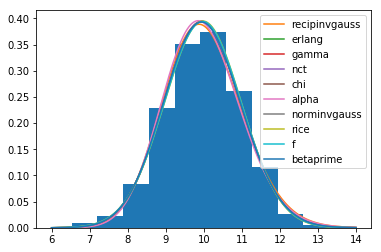

In [9]:
bestDist=np.array(distrlist)[np.argsort(np.array(listBICvar))[0:10]]
bestBICvar=np.sort(np.array(listBICvar))[0:10]
bestBIC=np.array(listBICprom)[np.argsort(np.array(listBICvar))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('BIC: ',bestBIC[i])
    print('Var BIC: ',bestBICvar[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Al igual que con el AIC se denota que los que menos varianza tienen no son necesariamente los que mejor se ajustan.

In [10]:
# Loop para Punto C 1% Contaminación
n = 1000 # Número de muestras
rep = 25  # Número de repeticiones
listAIC=[]
# Matriz para el punto C 1%
listAICTot_1=np.zeros((len(distrlist),rep))
for i in range(rep):
    np.random.seed(107+i)
    data = np.zeros(1000); data[:int(n*0.99)] = np.random.normal(10, 1, int(n*.99))
    data[int(n*0.99):] = np.random.normal(5, 1, int(n*.01))
    lnspc = np.linspace(6, 14, len(data))
    j = -1
    for distrName in distrlist:
        j+=1
        distr = getattr(stats.distributions, distrName)
        try:  
            #print('Distribución:',distrName)
            param = distr.fit(data)
            pdf = distr.pdf(lnspc, *param)
            #plt.plot(lnspc, pdf, label=distrName)
            #print('Número de parámetros: ',len(param))
            resAIC=AIC(distr,param,data)
            if resAIC<0:
                resAIC=np.Inf
            listAIC.append(resAIC)
            #print('AIC: ',resAIC)
            #print('*'*50)
        except:
            #print('Error')
            listAIC.append(np.Inf)
            resAIC=np.Inf
        listAICTot_1[j,i]=resAIC

Se crea una muestra de una normal y se le agragan 10 datos de otra normal para tener nuestra media de 1000 contaminada

In [11]:
listAICprom_1 = listAICTot_1.mean(axis=1)
listAICvar_1 = listAICTot_1.var(axis=1)

Distribución: johnsonsu
Número de parámetros:  4
AIC:  2979.932990868409
Var AIC:  2205.227869865898
**************************************************
Distribución: genlogistic
Número de parámetros:  3
AIC:  2983.4536203748194
Var AIC:  2201.132525112787
**************************************************
Distribución: burr12
Número de parámetros:  4
AIC:  2984.0133566801405
Var AIC:  2185.2394773487404
**************************************************
Distribución: t
Número de parámetros:  3
AIC:  2984.8214667285147
Var AIC:  2122.4834247036365
**************************************************
Distribución: mielke
Número de parámetros:  4
AIC:  2986.007248910651
Var AIC:  2215.14459945808
**************************************************
Distribución: burr
Número de parámetros:  4
AIC:  2990.6226385028085
Var AIC:  2047.340810265519
**************************************************
Distribución: tukeylambda
Número de parámetros:  3
AIC:  2990.7551447693027
Var AIC:  2116.665493913

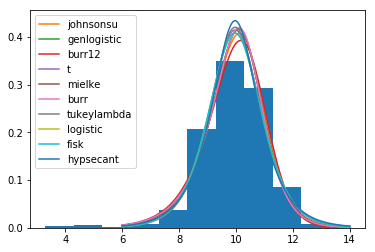

In [12]:
bestDist_1=np.array(distrlist)[np.argsort(np.array(listAICprom_1))[0:10]]
bestAIC_1=np.sort(np.array(listAICprom_1))[0:10]
bestAICvar_1=np.array(listAICvar_1)[np.argsort(np.array(listAICprom_1))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist_1)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_1[i])
    print('Var AIC: ',bestAICvar_1[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Es de esperarce que ya la distribución que mejor se ajusta no es la normal, dado que una parte de los datos estan diciendo que esta puede ser una distribución con colas pesadas, dado que son pocos los datos introducidos, por ende es de esperar que la t sea una de las distribuciones que mejor ajustan.

Distribución: gennorm
Número de parámetros:  3
AIC:  3009.7214363249436
Var AIC:  1987.7371063832472
**************************************************
Distribución: pearson3
Número de parámetros:  3
AIC:  3011.6610067551624
Var AIC:  2039.8283332014823
**************************************************
Distribución: burr
Número de parámetros:  4
AIC:  2990.6226385028085
Var AIC:  2047.340810265519
**************************************************
Distribución: logistic
Número de parámetros:  2
AIC:  2991.637184351488
Var AIC:  2061.522552658494
**************************************************
Distribución: fisk
Número de parámetros:  3
AIC:  2993.65489034113
Var AIC:  2061.7420392096788
**************************************************
Distribución: powernorm
Número de parámetros:  3
AIC:  3006.3119548902655
Var AIC:  2063.411392135925
**************************************************
Distribución: loggamma
Número de parámetros:  3
AIC:  3002.8784565863407
Var AIC:  2071.17485561

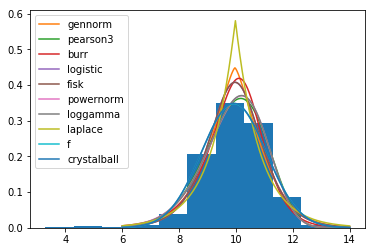

In [13]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICvar_1))[0:10]]
bestAICvar_1=np.sort(np.array(listAICvar_1))[0:10]
bestAIC_1=np.array(listAICprom_1)[np.argsort(np.array(listAICvar_1))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_1[i])
    print('Var AIC: ',bestAICvar_1[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Este unicamente se realiza para ver si aportaba algo más al calculo, pero a mi parecer el promedio de estas es medida suficiente

In [14]:
# Loop para Punto C 5% Contaminación
n = 1000 # Número de muestras
rep = 25  # Número de repeticiones
listAIC=[]
# Matriz para el punto C 1%
listAICTot_5=np.zeros((len(distrlist),rep))
for i in range(rep):
    np.random.seed(107+i)
    data = np.zeros(1000); data[:int(n*0.95)] = np.random.normal(10, 1, int(n*.95))
    data[int(n*0.95):] = np.random.normal(5, 1, int(n*.05))
    lnspc = np.linspace(6, 14, len(data))
    j = -1
    for distrName in distrlist:
        j+=1
        distr = getattr(stats.distributions, distrName)
        try:  
            #print('Distribución:',distrName)
            param = distr.fit(data)
            pdf = distr.pdf(lnspc, *param)
            #plt.plot(lnspc, pdf, label=distrName)
            #print('Número de parámetros: ',len(param))
            resAIC=AIC(distr,param,data)
            if resAIC<0:
                resAIC=np.Inf
            listAIC.append(resAIC)
            #print('AIC: ',resAIC)
            #print('*'*50)
        except:
            #print('Error')
            listAIC.append(np.Inf)
            resAIC=np.Inf
        listAICTot_5[j,i]=resAIC

Se crea una muestra de una normal y se le agragan 50 datos de otra normal para tener nuestra media de 1000 contaminada

In [15]:
listAICprom_5 = listAICTot_5.mean(axis=1)
listAICvar_5 = listAICTot_5.var(axis=1)

Distribución: johnsonsu
Número de parámetros:  4
AIC:  3314.130601852353
Var AIC:  1832.8386536024816
**************************************************
Distribución: genlogistic
Número de parámetros:  3
AIC:  3324.2265490411105
Var AIC:  1722.0679746195517
**************************************************
Distribución: mielke
Número de parámetros:  4
AIC:  3328.347265336746
Var AIC:  1684.8975374377335
**************************************************
Distribución: burr
Número de parámetros:  4
AIC:  3332.0077930178686
Var AIC:  1825.8494212271096
**************************************************
Distribución: t
Número de parámetros:  3
AIC:  3361.165226555434
Var AIC:  1545.50952310046
**************************************************
Distribución: loggamma
Número de parámetros:  3
AIC:  3365.1549137140855
Var AIC:  1856.6153171033852
**************************************************
Distribución: gumbel_l
Número de parámetros:  2
AIC:  3366.839594332289
Var AIC:  1977.433845473

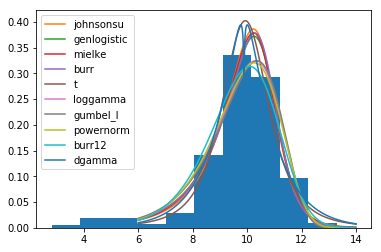

In [16]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICprom_5))[0:10]]
bestAIC_5=np.sort(np.array(listAICprom_5))[0:10]
bestAICvar_5=np.array(listAICvar_5)[np.argsort(np.array(listAICprom_5))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_5[i])
    print('Var AIC: ',bestAICvar_5[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Ya para este caso se enpieza a denotar que la distribución probablemente se ajuste mejor una que no sea simétrica, o que sea bimodal, pero siguen siendo muy pocos los datos que me estan contaminando la normal, por lo cual la t sigue siendo una de las que menor AIC tengan.

Distribución: dweibull
Número de parámetros:  3
AIC:  3403.44705511056
Var AIC:  1295.0051129031103
**************************************************
Distribución: laplace
Número de parámetros:  2
AIC:  3402.646817143788
Var AIC:  1298.0820491435081
**************************************************
Distribución: fisk
Número de parámetros:  3
AIC:  3442.565100356646
Var AIC:  1305.7481925598106
**************************************************
Distribución: logistic
Número de parámetros:  2
AIC:  3440.499588264477
Var AIC:  1306.8865503261627
**************************************************
Distribución: dgamma
Número de parámetros:  3
AIC:  3399.797589773771
Var AIC:  1315.368996860785
**************************************************
Distribución: gennorm
Número de parámetros:  3
AIC:  3403.636679557096
Var AIC:  1319.4503596510042
**************************************************
Distribución: hypsecant
Número de parámetros:  2
AIC:  3403.9933427817496
Var AIC:  1321.961623413

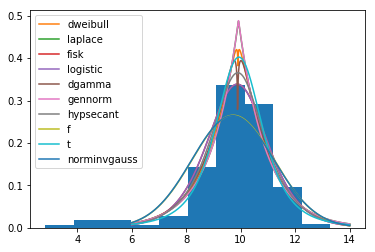

In [17]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICvar_5))[0:10]]
bestAICvar_5=np.sort(np.array(listAICvar_5))[0:10]
bestAIC_5=np.array(listAICprom_5)[np.argsort(np.array(listAICvar_5))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_5[i])
    print('Var AIC: ',bestAICvar_5[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

In [18]:
# Loop para Punto C 10% Contaminación
n = 1000 # Número de muestras
rep = 25  # Número de repeticiones
listAIC=[]
# Matriz para el punto C 1%
listAICTot_10=np.zeros((len(distrlist),rep))
for i in range(rep):
    np.random.seed(107+i)
    data = np.zeros(1000); data[:int(n*0.9)] = np.random.normal(10, 1, int(n*.9))
    data[int(n*0.9):] = np.random.normal(5, 1, int(n*.1))
    lnspc = np.linspace(6, 14, len(data))
    j = -1
    for distrName in distrlist:
        j+=1
        distr = getattr(stats.distributions, distrName)
        try:  
            #print('Distribución:',distrName)
            param = distr.fit(data)
            pdf = distr.pdf(lnspc, *param)
            #plt.plot(lnspc, pdf, label=distrName)
            #print('Número de parámetros: ',len(param))
            resAIC=AIC(distr,param,data)
            if resAIC<0:
                resAIC=np.Inf
            listAIC.append(resAIC)
            #print('AIC: ',resAIC)
            #print('*'*50)
        except:
            #print('Error')
            listAIC.append(np.Inf)
            resAIC=np.Inf
        listAICTot_10[j,i]=resAIC

Se crea una muestra de una normal y se le agragan 100 datos de otra normal para tener nuestra media de 1000 contaminada

In [19]:
listAICprom_10 = listAICTot_10.mean(axis=1)
listAICvar_10 = listAICTot_10.var(axis=1)

Distribución: johnsonsu
Número de parámetros:  4
AIC:  3625.934167002194
Var AIC:  1570.748092281151
**************************************************
Distribución: genlogistic
Número de parámetros:  3
AIC:  3632.578370626709
Var AIC:  1418.7373203673167
**************************************************
Distribución: mielke
Número de parámetros:  4
AIC:  3637.5355417852443
Var AIC:  1351.7894758586303
**************************************************
Distribución: burr
Número de parámetros:  4
AIC:  3656.964262386668
Var AIC:  2325.676960171272
**************************************************
Distribución: loggamma
Número de parámetros:  3
AIC:  3672.4401166214166
Var AIC:  1577.9249174830472
**************************************************
Distribución: gumbel_l
Número de parámetros:  2
AIC:  3678.9227702574067
Var AIC:  1315.1152177391082
**************************************************
Distribución: gompertz
Número de parámetros:  3
AIC:  3690.0618772278076
Var AIC:  4722.2

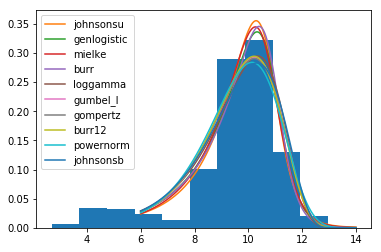

In [20]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICprom_10))[0:10]]
bestAIC_10=np.sort(np.array(listAICprom_10))[0:10]
bestAICvar_10=np.array(listAICvar_10)[np.argsort(np.array(listAICprom_10))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_10[i])
    print('Var AIC: ',bestAICvar_10[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

### Notas



Para este caso, ya los datos contaminados me dicen que mi distribución no es simetrica, por lo cual no podemos determinar que los datos provienen de una normal, sino que se deben adecuar otras distribuciones.

Distribución: fisk
Número de parámetros:  3
AIC:  3870.8068679865305
Var AIC:  773.7299662032087
**************************************************
Distribución: logistic
Número de parámetros:  2
AIC:  3868.4985978239465
Var AIC:  778.6706582439657
**************************************************
Distribución: hypsecant
Número de parámetros:  2
AIC:  3810.7047962547
Var AIC:  786.1554101954766
**************************************************
Distribución: laplace
Número de parámetros:  2
AIC:  3774.215760837032
Var AIC:  796.8389109834534
**************************************************
Distribución: dgamma
Número de parámetros:  3
AIC:  3771.677885529006
Var AIC:  819.5910056761318
**************************************************
Distribución: dweibull
Número de parámetros:  3
AIC:  3766.6201331537145
Var AIC:  846.0561922420519
**************************************************
Distribución: gennorm
Número de parámetros:  3
AIC:  3762.4416697033193
Var AIC:  889.1464831489883

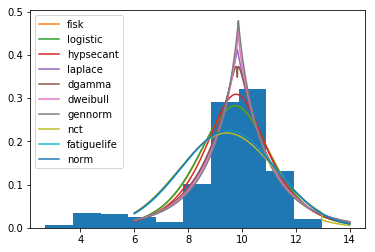

In [21]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICvar_10))[0:10]]
bestAICvar_10=np.sort(np.array(listAICvar_10))[0:10]
bestAIC_10=np.array(listAICprom_10)[np.argsort(np.array(listAICvar_10))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_10[i])
    print('Var AIC: ',bestAICvar_10[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

### Notas



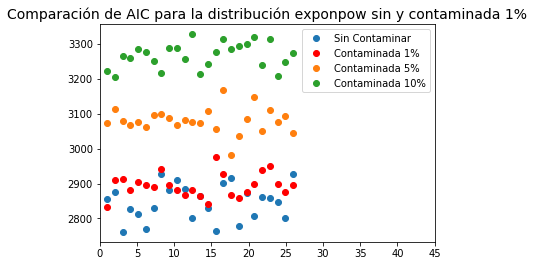

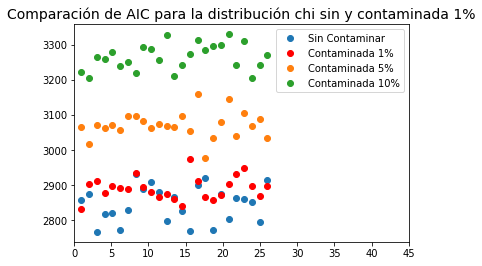

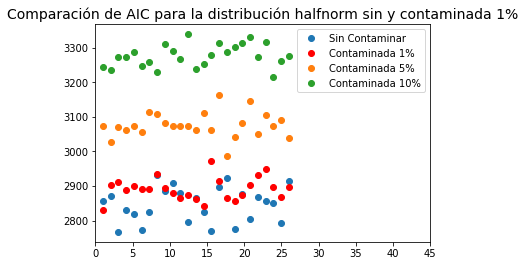

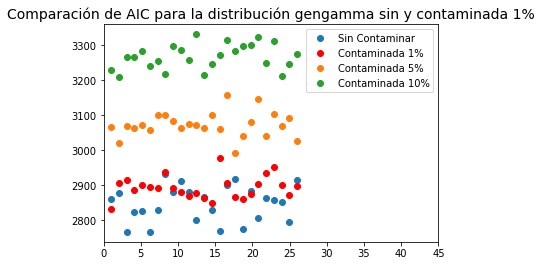

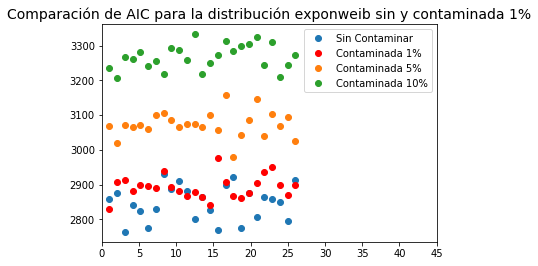

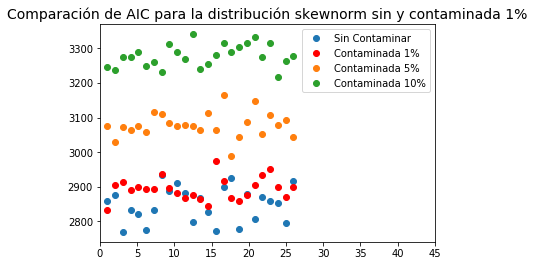

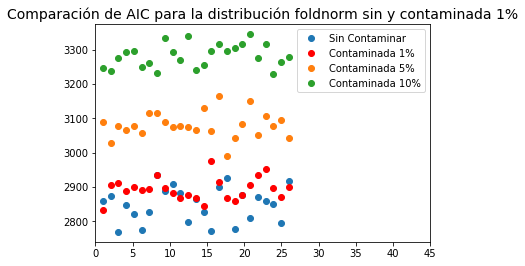

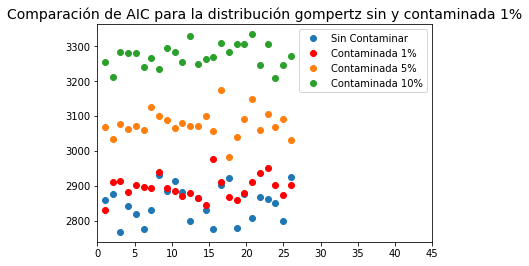

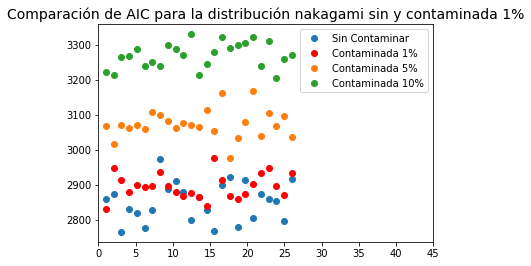

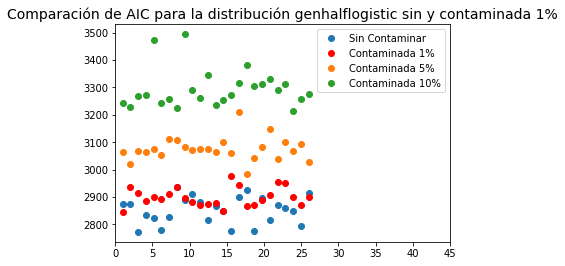

In [48]:
##### Punto D con 1% contaminado
distrlistSorted=np.array(distrlist)[np.argsort(np.array(listAICprom))[0:10]]
listAICSorted=np.array(listAICTot)[np.argsort(np.array(listAICprom))[0:10],:]
listAICSorted_1=np.array(listAICTot_1)[np.argsort(np.array(listAICprom))[0:10],:]
listAICSorted_5=np.array(listAICTot_5)[np.argsort(np.array(listAICprom))[0:10],:]
listAICSorted_10=np.array(listAICTot_10)[np.argsort(np.array(listAICprom))[0:10],:]

x = np.linspace(1, rep+1, rep)
for i in range(len(distrlistSorted)):
    plt.plot(x, listAICSorted[i,:], "o",x, listAICSorted_1[i,:],"ro", x, listAICSorted_5[i,:], "o", x, listAICSorted_10[i,:],"o" )
    plt.xlim(0, 45)
    plt.title('Comparación de AIC para la distribución '+distrlistSorted[i]+' sin y contaminada 1%', size=14)
    plt.legend(('Sin Contaminar', 'Contaminada 1%', 'Contaminada 5%', 'Contaminada 10%'))
    plt.show()

Al comparar los AIC con el 1% datos contaminados (de los 10 mejores AIC sin contaminar), con los AIC de los datos sin contaminar se denota que siempre los contaminados poseen mayor AIC, mostrando que el AIC no es una medida robusta con respecto a los datos contaminados y que además este sesgo que se genera depende de cada distribución, adicional a esto que entre la muestra posea más datos contaminados, el AIC crece mucho más, lo cual indica que el AIC no es una medida robusta a datos contamidados.

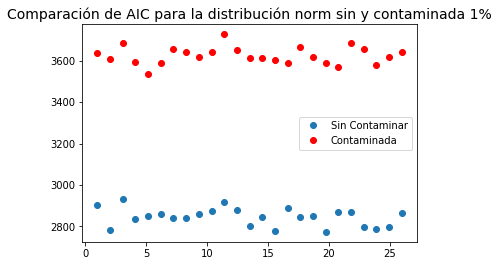

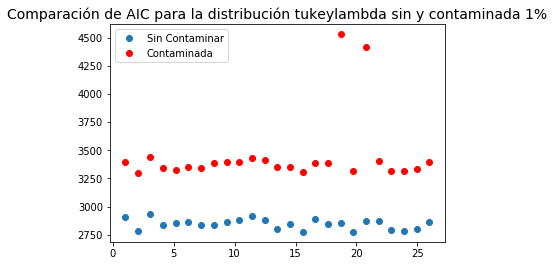

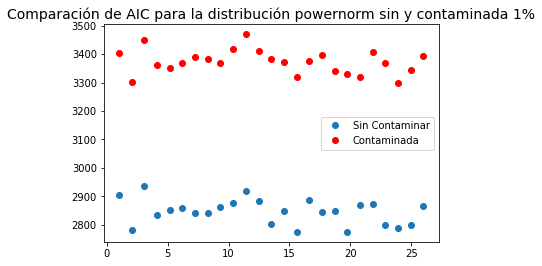

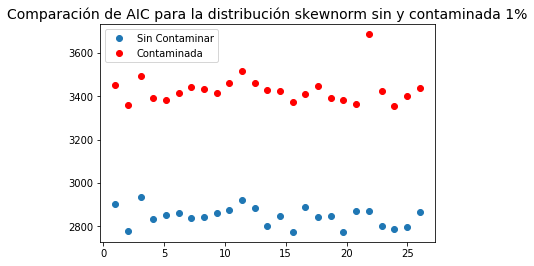

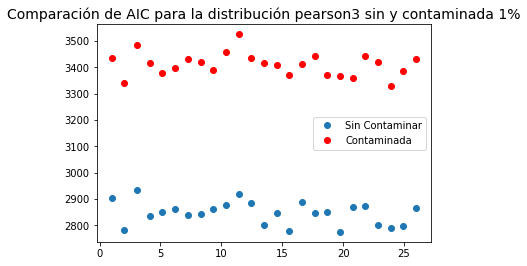

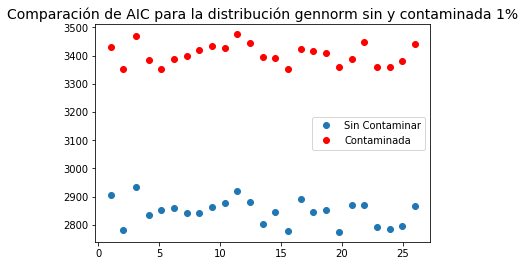

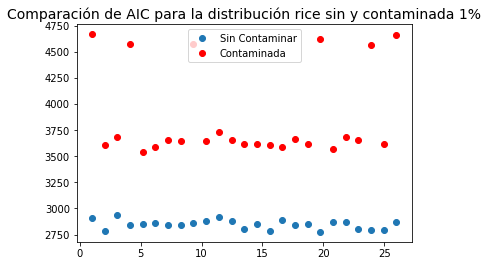

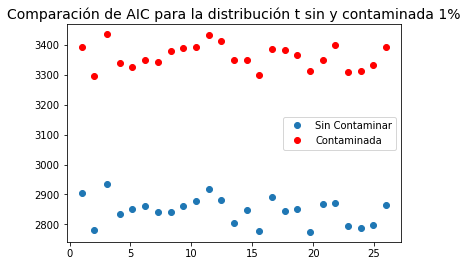

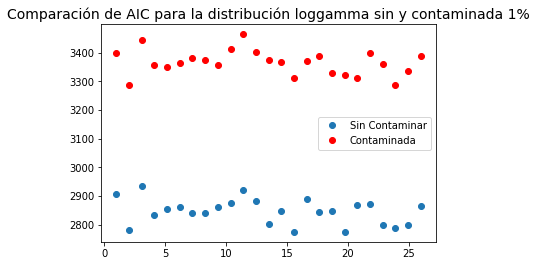

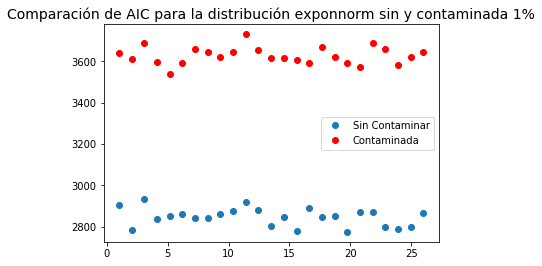

In [23]:
##### Punto D con 5% contaminado
distrlistSorted=np.array(distrlist)[np.argsort(np.array(listAICprom))[0:10]]
listAICSorted=np.array(listAICTot)[np.argsort(np.array(listAICprom))[0:10],:]
listAICSorted_5=np.array(listAICTot_5)[np.argsort(np.array(listAICprom))[0:10],:]

x = np.linspace(1, rep+1, rep)
for i in range(len(distrlistSorted)):
    plt.plot(x, listAICSorted[i,:], "o",x, listAICSorted_5[i,:],"ro")
    plt.title('Comparación de AIC para la distribución '+distrlistSorted[i]+' sin y contaminada 1%', size=14)
    plt.legend(('Sin Contaminar', 'Contaminada'))
    plt.show()

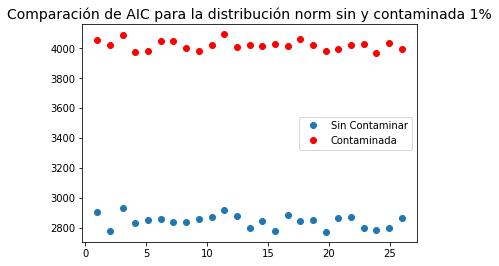

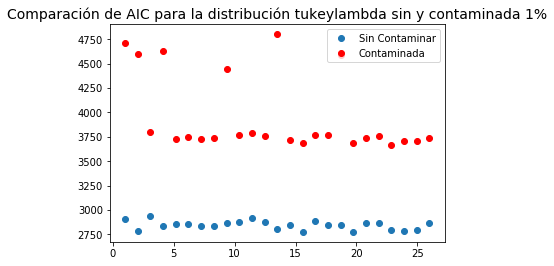

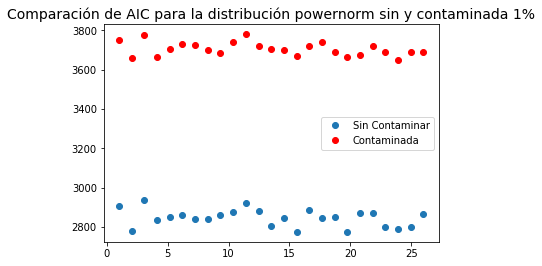

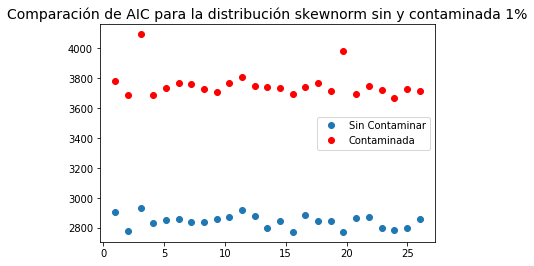

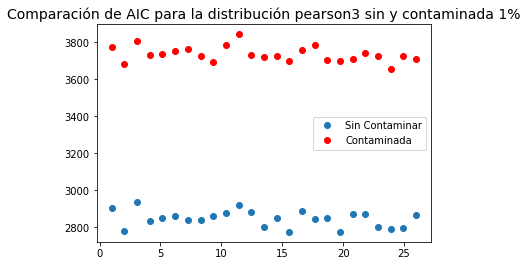

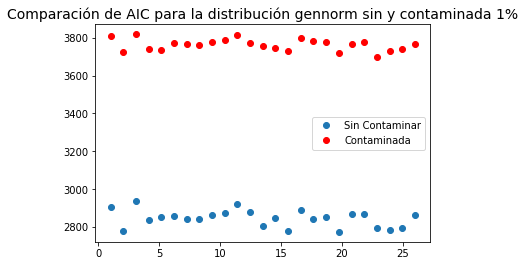

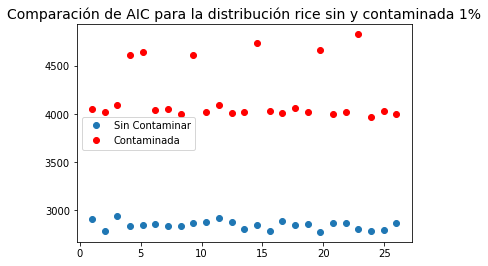

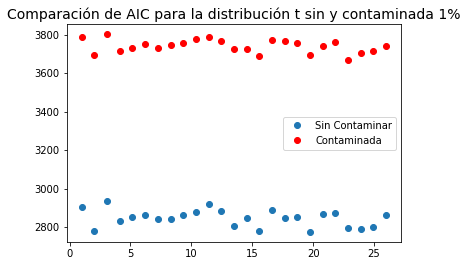

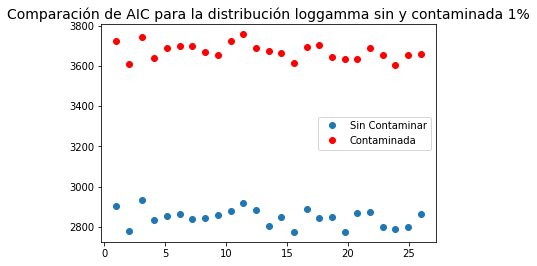

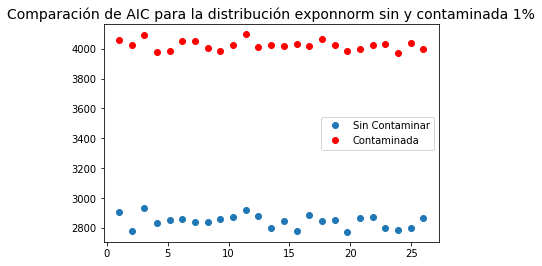

In [24]:
##### Punto D con 10% contaminado
distrlistSorted=np.array(distrlist)[np.argsort(np.array(listAICprom))[0:10]]
listAICSorted=np.array(listAICTot)[np.argsort(np.array(listAICprom))[0:10],:]
listAICSorted_10=np.array(listAICTot_10)[np.argsort(np.array(listAICprom))[0:10],:]

x = np.linspace(1, rep+1, rep)
for i in range(len(distrlistSorted)):
    plt.plot(x, listAICSorted[i,:], "o",x, listAICSorted_10[i,:],"ro")
    plt.title('Comparación de AIC para la distribución '+distrlistSorted[i]+' sin y contaminada 1%', size=14)
    plt.legend(('Sin Contaminar', 'Contaminada'))
    plt.show()

In [25]:
# Loop para Punto E_A y E_B
n = 1000 # Número de muestras
rep = 25  # Número de repeticiones
listAIC=[]
# Matriz para el punto E_A
listAICTot=np.zeros((len(distrlist),rep))
# Matriz para el punto E_B
listBICTot=np.zeros((len(distrlist),rep))
for i in range(rep):
    data = abs(np.random.normal(0,2,n))
    lnspc = np.linspace(-0.5, 6, len(data))
    j = -1
    for distrName in distrlist:
        j+=1
        distr = getattr(stats.distributions, distrName)
        try:  
            #print('Distribución:',distrName)
            param = distr.fit(data)
            pdf = distr.pdf(lnspc, *param)
            #plt.plot(lnspc, pdf, label=distrName)
            #print('Número de parámetros: ',len(param))
            resAIC=AIC(distr,param,data)
            if resAIC<0:
                resAIC=np.Inf
            listAIC.append(resAIC)
            #print('AIC: ',resAIC)
            #print('*'*50)
            resBIC=BIC(distr,param,data)
            if resBIC<0:
                resBIC=np.Inf
        except:
            #print('Error')
            listAIC.append(np.Inf)
            resAIC=np.Inf
            resBIC=np.Inf
        listAICTot[j,i]=resAIC
        listBICTot[j,i]=resBIC

In [26]:
listAICprom = listAICTot.mean(axis=1)
listAICvar = listAICTot.var(axis=1)

Distribución: exponpow
Número de parámetros:  3
AIC:  2846.9127049869644
Var AIC:  2491.4349742131835
**************************************************
Distribución: chi
Número de parámetros:  3
AIC:  2847.0929916538007
Var AIC:  2499.176736903177
**************************************************
Distribución: halfnorm
Número de parámetros:  2
AIC:  2847.2044617918978
Var AIC:  2424.214552590705
**************************************************
Distribución: gengamma
Número de parámetros:  4
AIC:  2847.583772858981
Var AIC:  2446.0249000981376
**************************************************
Distribución: exponweib
Número de parámetros:  4
AIC:  2848.3906784721034
Var AIC:  2417.043877388145
**************************************************
Distribución: skewnorm
Número de parámetros:  3
AIC:  2849.5363189427576
Var AIC:  2430.0658702866217
**************************************************
Distribución: foldnorm
Número de parámetros:  3
AIC:  2849.7633840446015
Var AIC:  2402.04

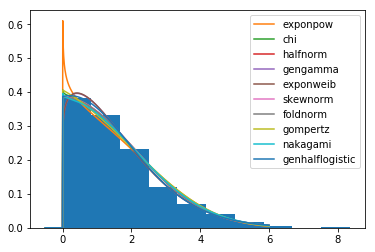

In [27]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICprom))[0:10]]
bestAIC=np.sort(np.array(listAICprom))[0:10]
bestAICvar=np.array(listAICvar)[np.argsort(np.array(listAICprom))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC[i])
    print('Var AIC: ',bestAICvar[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Distribución: dgamma
Número de parámetros:  3
AIC:  3224.158632125363
Var AIC:  2216.239069222829
**************************************************
Distribución: kstwobign
Número de parámetros:  2
AIC:  2985.5454819048173
Var AIC:  2234.665151477737
**************************************************
Distribución: tukeylambda
Número de parámetros:  3
AIC:  3211.7449821145174
Var AIC:  2265.374863578222
**************************************************
Distribución: rayleigh
Número de parámetros:  2
AIC:  3008.9396774802603
Var AIC:  2269.2168029879826
**************************************************
Distribución: rice
Número de parámetros:  3
AIC:  3010.939676677991
Var AIC:  2269.2168073449693
**************************************************
Distribución: t
Número de parámetros:  3
AIC:  3208.683563912443
Var AIC:  2286.5820518735977
**************************************************
Distribución: gumbel_r
Número de parámetros:  2
AIC:  3007.339926932691
Var AIC:  2289.0898024383

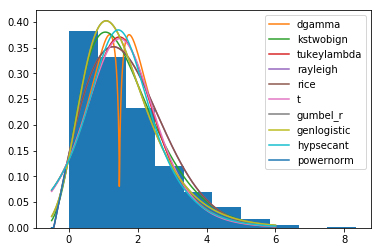

In [28]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICvar))[0:10]]
bestAICvar=np.sort(np.array(listAICvar))[0:10]
bestAIC=np.array(listAICprom)[np.argsort(np.array(listAICvar))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC[i])
    print('Var AIC: ',bestAICvar[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

In [29]:
#Punto E_B
listBICprom = listBICTot.mean(axis=1)
listBICvar = listBICTot.var(axis=1)

Distribución: halfnorm
Número de parámetros:  2
BIC:  2857.019972349862
Var BIC:  2424.214552590705
**************************************************
Distribución: exponpow
Número de parámetros:  3
BIC:  2861.6359708239097
Var BIC:  2491.434974213183
**************************************************
Distribución: chi
Número de parámetros:  3
BIC:  2861.8162574907474
Var BIC:  2499.176736903177
**************************************************
Distribución: skewnorm
Número de parámetros:  3
BIC:  2864.2595847797033
Var BIC:  2430.0658702866212
**************************************************
Distribución: foldnorm
Número de parámetros:  3
BIC:  2864.486649881548
Var BIC:  2402.047699367355
**************************************************
Distribución: gompertz
Número de parámetros:  3
BIC:  2864.833571849221
Var BIC:  2407.0771496576704
**************************************************
Distribución: nakagami
Número de parámetros:  3
BIC:  2865.9925809182455
Var BIC:  2933.439783

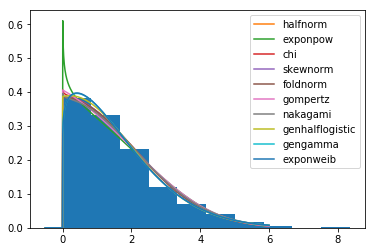

In [30]:
bestDist=np.array(distrlist)[np.argsort(np.array(listBICprom))[0:10]]
bestBIC=np.sort(np.array(listBICprom))[0:10]
bestBICvar=np.array(listBICvar)[np.argsort(np.array(listBICprom))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('BIC: ',bestBIC[i])
    print('Var BIC: ',bestBICvar[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Distribución: dgamma
Número de parámetros:  3
BIC:  3238.8818979623093
Var BIC:  2216.239069222829
**************************************************
Distribución: kstwobign
Número de parámetros:  2
BIC:  2995.3609924627817
Var BIC:  2234.665151477737
**************************************************
Distribución: tukeylambda
Número de parámetros:  3
BIC:  3226.4682479514636
Var BIC:  2265.374863578222
**************************************************
Distribución: rayleigh
Número de parámetros:  2
BIC:  3018.755188038225
Var BIC:  2269.2168029879826
**************************************************
Distribución: rice
Número de parámetros:  3
BIC:  3025.6629425149376
Var BIC:  2269.2168073449693
**************************************************
Distribución: t
Número de parámetros:  3
BIC:  3223.406829749388
Var BIC:  2286.5820518735977
**************************************************
Distribución: gumbel_r
Número de parámetros:  2
BIC:  3017.1554374906555
Var BIC:  2289.08980243

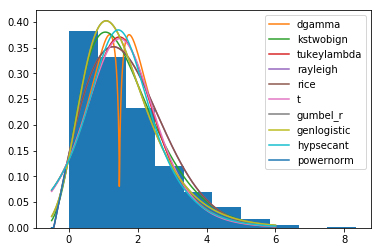

In [31]:
bestDist=np.array(distrlist)[np.argsort(np.array(listBICvar))[0:10]]
bestBICvar=np.sort(np.array(listBICvar))[0:10]
bestBIC=np.array(listBICprom)[np.argsort(np.array(listBICvar))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('BIC: ',bestBIC[i])
    print('Var BIC: ',bestBICvar[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

In [32]:
# Loop para Punto E_C 1% Contaminación
n = 1000 # Número de muestras
rep = 25  # Número de repeticiones
listAIC=[]
# Matriz para el punto E_C 1%
listAICTot_1=np.zeros((len(distrlist),rep))
for i in range(rep):
    data = np.zeros(1000); data[:int(n*0.99)] = abs(np.random.normal(0, 2, int(n*.99)))
    data[int(n*0.99):] = np.random.normal(5, 1, int(n*.01))
    lnspc = np.linspace(-0.5, 10, len(data))
    j = -1
    for distrName in distrlist:
        j+=1
        distr = getattr(stats.distributions, distrName)
        try:  
            #print('Distribución:',distrName)
            param = distr.fit(data)
            pdf = distr.pdf(lnspc, *param)
            #plt.plot(lnspc, pdf, label=distrName)
            #print('Número de parámetros: ',len(param))
            resAIC=AIC(distr,param,data)
            if resAIC<0:
                resAIC=np.Inf
            listAIC.append(resAIC)
            #print('AIC: ',resAIC)
            #print('*'*50)
        except:
            #print('Error')
            listAIC.append(np.Inf)
            resAIC=np.Inf
        listAICTot_1[j,i]=resAIC

In [33]:
listAICprom_1 = listAICTot_1.mean(axis=1)
listAICvar_1 = listAICTot_1.var(axis=1)

Distribución: chi
Número de parámetros:  3
AIC:  2892.011033651753
Var AIC:  1045.9566568750868
**************************************************
Distribución: halfnorm
Número de parámetros:  2
AIC:  2892.1502793432037
Var AIC:  1007.5956313980153
**************************************************
Distribución: exponweib
Número de parámetros:  4
AIC:  2893.419267941297
Var AIC:  1047.1475201073556
**************************************************
Distribución: gengamma
Número de parámetros:  4
AIC:  2893.5335143187945
Var AIC:  1021.0358332084196
**************************************************
Distribución: skewnorm
Número de parámetros:  3
AIC:  2894.179046462806
Var AIC:  1011.589022911916
**************************************************
Distribución: foldnorm
Número de parámetros:  3
AIC:  2894.373815744687
Var AIC:  995.1484083850219
**************************************************
Distribución: exponpow
Número de parámetros:  3
AIC:  2894.684820102503
Var AIC:  1076.27910

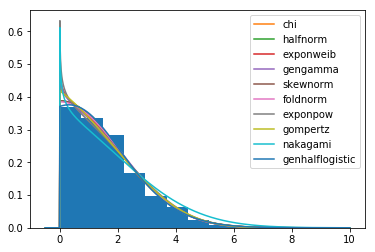

In [34]:
bestDist_1=np.array(distrlist)[np.argsort(np.array(listAICprom_1))[0:10]]
bestAIC_1=np.sort(np.array(listAICprom_1))[0:10]
bestAICvar_1=np.array(listAICvar_1)[np.argsort(np.array(listAICprom_1))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist_1)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_1[i])
    print('Var AIC: ',bestAICvar_1[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Distribución: moyal
Número de parámetros:  2
AIC:  3014.3063560214573
Var AIC:  904.293387312121
**************************************************
Distribución: johnsonsb
Número de parámetros:  4
AIC:  2934.3509357711587
Var AIC:  917.6700465784536
**************************************************
Distribución: nct
Número de parámetros:  4
AIC:  3027.0457268819196
Var AIC:  922.5376619181557
**************************************************
Distribución: invgamma
Número de parámetros:  3
AIC:  3016.594023807178
Var AIC:  923.7787596050766
**************************************************
Distribución: genextreme
Número de parámetros:  3
AIC:  3028.256195279011
Var AIC:  926.3123248647105
**************************************************
Distribución: invweibull
Número de parámetros:  3
AIC:  3028.2561934378637
Var AIC:  926.3123357345399
**************************************************
Distribución: norminvgauss
Número de parámetros:  4
AIC:  2986.453273850846
Var AIC:  929.5122

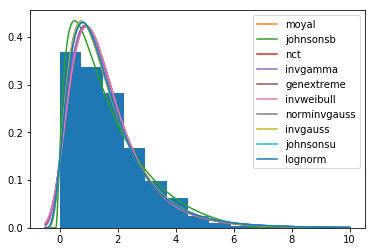

In [35]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICvar_1))[0:10]]
bestAICvar_1=np.sort(np.array(listAICvar_1))[0:10]
bestAIC_1=np.array(listAICprom_1)[np.argsort(np.array(listAICvar_1))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_1[i])
    print('Var AIC: ',bestAICvar_1[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

In [36]:
# Loop para Punto E_C 5% Contaminación
n = 1000 # Número de muestras
rep = 25  # Número de repeticiones
listAIC=[]
# Matriz para el punto C 1%
listAICTot_5=np.zeros((len(distrlist),rep))
for i in range(rep):
    data = np.zeros(1000); data[:int(n*0.95)] = abs(np.random.normal(0, 2, int(n*.95)))
    data[int(n*0.95):] = np.random.normal(5, 1, int(n*.05))
    lnspc = np.linspace(-0.5, 10, len(data))
    j = -1
    for distrName in distrlist:
        j+=1
        distr = getattr(stats.distributions, distrName)
        try:  
            #print('Distribución:',distrName)
            param = distr.fit(data)
            pdf = distr.pdf(lnspc, *param)
            #plt.plot(lnspc, pdf, label=distrName)
            #print('Número de parámetros: ',len(param))
            resAIC=AIC(distr,param,data)
            if resAIC<0:
                resAIC=np.Inf
            listAIC.append(resAIC)
            #print('AIC: ',resAIC)
            #print('*'*50)
        except:
            #print('Error')
            listAIC.append(np.Inf)
            resAIC=np.Inf
        listAICTot_5[j,i]=resAIC

In [37]:
listAICprom_5 = listAICTot_5.mean(axis=1)
listAICvar_5 = listAICTot_5.var(axis=1)

Distribución: chi
Número de parámetros:  3
AIC:  3071.53590257579
Var AIC:  1325.0129257567844
**************************************************
Distribución: beta
Número de parámetros:  4
AIC:  3072.375878926955
Var AIC:  1250.771929145426
**************************************************
Distribución: exponweib
Número de parámetros:  4
AIC:  3073.092405155856
Var AIC:  1339.5393408550697
**************************************************
Distribución: gengamma
Número de parámetros:  4
AIC:  3073.2182824697315
Var AIC:  1242.5418690459383
**************************************************
Distribución: nakagami
Número de parámetros:  3
AIC:  3074.26878252382
Var AIC:  1575.9215393741865
**************************************************
Distribución: genhalflogistic
Número de parámetros:  3
AIC:  3075.2747642761333
Var AIC:  1800.4223397835956
**************************************************
Distribución: genpareto
Número de parámetros:  3
AIC:  3075.451007845396
Var AIC:  1271.29

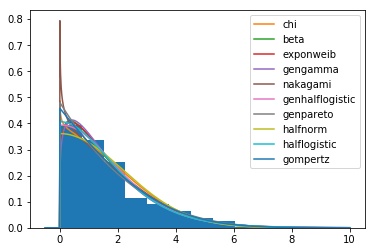

In [38]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICprom_5))[0:10]]
bestAIC_5=np.sort(np.array(listAICprom_5))[0:10]
bestAICvar_5=np.array(listAICvar_5)[np.argsort(np.array(listAICprom_5))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_5[i])
    print('Var AIC: ',bestAICvar_5[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Distribución: johnsonsb
Número de parámetros:  4
AIC:  3094.3007717312325
Var AIC:  1113.6105465566009
**************************************************
Distribución: gausshyper
Número de parámetros:  6
AIC:  3079.338428894329
Var AIC:  1223.549686153454
**************************************************
Distribución: exponpow
Número de parámetros:  3
AIC:  3080.5829908287847
Var AIC:  1232.7024595782382
**************************************************
Distribución: gengamma
Número de parámetros:  4
AIC:  3073.2182824697315
Var AIC:  1242.5418690459383
**************************************************
Distribución: beta
Número de parámetros:  4
AIC:  3072.375878926955
Var AIC:  1250.771929145426
**************************************************
Distribución: skewnorm
Número de parámetros:  3
AIC:  3078.650104437007
Var AIC:  1256.3994748863522
**************************************************
Distribución: halfnorm
Número de parámetros:  2
AIC:  3076.2418991468003
Var AIC:  1260.

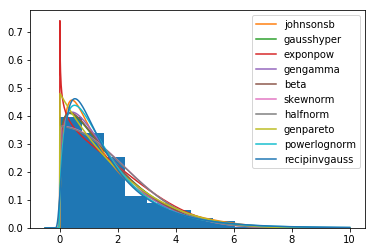

In [39]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICvar_5))[0:10]]
bestAICvar_5=np.sort(np.array(listAICvar_5))[0:10]
bestAIC_5=np.array(listAICprom_5)[np.argsort(np.array(listAICvar_5))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_5[i])
    print('Var AIC: ',bestAICvar_5[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

In [40]:
# Loop para Punto E_C 10% Contaminación
n = 1000 # Número de muestras
rep = 25  # Número de repeticiones
listAIC=[]
# Matriz para el punto C 1%
listAICTot_10=np.zeros((len(distrlist),rep))
for i in range(rep):
    data = np.zeros(1000); data[:int(n*0.9)] = abs(np.random.normal(0, 2, int(n*.9)))
    data[int(n*0.9):] = np.random.normal(5, 1, int(n*.1))
    lnspc = np.linspace(0, 10, len(data))
    j = -1
    for distrName in distrlist:
        j+=1
        distr = getattr(stats.distributions, distrName)
        try:  
            #print('Distribución:',distrName)
            param = distr.fit(data)
            pdf = distr.pdf(lnspc, *param)
            #plt.plot(lnspc, pdf, label=distrName)
            #print('Número de parámetros: ',len(param))
            resAIC=AIC(distr,param,data)
            if resAIC<0:
                resAIC=np.Inf
            listAIC.append(resAIC)
            #print('AIC: ',resAIC)
            #print('*'*50)
        except:
            #print('Error')
            listAIC.append(np.Inf)
            resAIC=np.Inf
        listAICTot_10[j,i]=resAIC

In [41]:
listAICprom_10 = listAICTot_10.mean(axis=1)
listAICvar_10 = listAICTot_10.var(axis=1)

Distribución: genpareto
Número de parámetros:  3
AIC:  3261.5499657378696
Var AIC:  1217.6223435096558
**************************************************
Distribución: beta
Número de parámetros:  4
AIC:  3261.790096671554
Var AIC:  1246.301483087698
**************************************************
Distribución: chi
Número de parámetros:  3
AIC:  3265.483143376344
Var AIC:  1317.2022451084017
**************************************************
Distribución: gausshyper
Número de parámetros:  6
AIC:  3266.734781661464
Var AIC:  1372.0336504483491
**************************************************
Distribución: exponpow
Número de parámetros:  3
AIC:  3266.781493545229
Var AIC:  1257.5140204796985
**************************************************
Distribución: exponweib
Número de parámetros:  4
AIC:  3267.45951009123
Var AIC:  1211.1886571321304
**************************************************
Distribución: gengamma
Número de parámetros:  4
AIC:  3267.853919374582
Var AIC:  1240.9114944

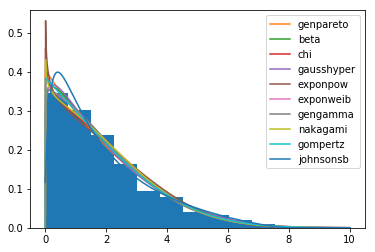

In [42]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICprom_10))[0:10]]
bestAIC_10=np.sort(np.array(listAICprom_10))[0:10]
bestAICvar_10=np.array(listAICvar_10)[np.argsort(np.array(listAICprom_10))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_10[i])
    print('Var AIC: ',bestAICvar_10[i])
    print('*'*50)
                
plt.legend()                 
plt.show()

Distribución: loggamma
Número de parámetros:  3
AIC:  3751.259956396093
Var AIC:  851.3292780174613
**************************************************
Distribución: rdist
Número de parámetros:  3
AIC:  3741.915470812536
Var AIC:  857.2396761446342
**************************************************
Distribución: norm
Número de parámetros:  2
AIC:  3739.823167248717
Var AIC:  857.4219539103699
**************************************************
Distribución: crystalball
Número de parámetros:  4
AIC:  3743.8231672487454
Var AIC:  857.4219539109915
**************************************************
Distribución: rice
Número de parámetros:  3
AIC:  3499.9168614227765
Var AIC:  905.9163220462475
**************************************************
Distribución: rayleigh
Número de parámetros:  2
AIC:  3497.9168620832043
Var AIC:  905.9163254743065
**************************************************
Distribución: powernorm
Número de parámetros:  3
AIC:  3500.245266812878
Var AIC:  907.322799346608

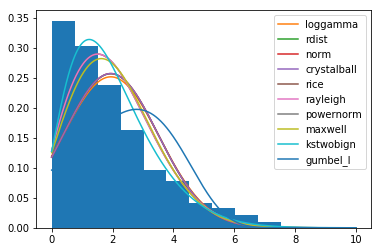

'\nEco\n'

In [44]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAICvar_10))[0:10]]
bestAICvar_10=np.sort(np.array(listAICvar_10))[0:10]
bestAIC_10=np.array(listAICprom_10)[np.argsort(np.array(listAICvar_10))[0:10]]

plt.hist(data, normed=True)

distrNameList = list(bestDist)

for i in range(len(distrNameList)):
    distr = getattr(stats.distributions, distrNameList[i])
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrNameList[i])
    print('Distribución:',distrNameList[i])
    print('Número de parámetros: ',len(param))
    print('AIC: ',bestAIC_10[i])
    print('Var AIC: ',bestAICvar_10[i])
    print('*'*50)
                
plt.legend()                 
plt.show()


Al realizar el mismo ajuste que en los puntos A, B y C, pero con respecto al valor absoluto de los datos y realizar el calculo del AIC, denotamos que nos ajusta diferentes distribuciones, pero en este caso no se parecen a la normal, aunque cuando se calcula la varianza de los datos y se hayan los de menor varianza, distribuciones que no parecen ajustarse bien son las que aparecen, por ende se recomienda que para estos casos se use mejor como medida de comparación el promedio, que nos indica distribuciones que se ajustan más o menos de manera correcta a nuestros datos.

Además es claro que la contaminación en este caso no parece afectar de gran medida, dado que los datos parecieran provenir de distribuciones similares o simplemente se consideran como una cola pesada.